<a href="https://colab.research.google.com/github/rajan083/GoatAITextGeneration/blob/master/GoatAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
print(pd.read_csv('/content/ask_reddit.csv'))

                                              title  score       id  \
0         What moment touched your heart yesterday?      1   plh0o4   
1      what would your superhero costume look like?      2   pld5l2   
2                                           Comment      1  hcaf574   
3                                           Comment      1  hcaf0eo   
4                                           Comment      1  hcaf0e3   
...                                             ...    ...      ...   
44921                                       Comment      1  hs6l9ez   
44922                                       Comment      1  hs6l9cy   
44923                                       Comment      1  hs6l9cn   
44924                                       Comment      1  hs6l9c7   
44925                                       Comment      1  hs6l9bu   

                                                     url  comms_num  \
0      https://www.reddit.com/r/AskReddit/comments/pl...          0   
1    

# **Image Generator with GAN(Generative Adversial Network) with Generator and Discriminator**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def build_generator():
  model = Sequential()
  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(784, activation='tanh'))
  model.add(Reshape((28,28,1)))
  return model

generator = build_generator()

def build_discriminator():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28,1)))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  return model

discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(0.0002,0.5), loss = 'binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False

gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(0.0002, 0.5), loss= 'binary_crossentropy')


def train_gan(epochs, batch_size = 128):
  x_train, y_train = mnist.load_data()
  x_train = (x_train[0].astype(np.float32) - 127.5)/127.5
  x_train = np.expand_dims(x_train, axis = 3)

  real = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images =  x_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_images, real)
    d_loss_fake = discriminator.train_on_batch(generated_images, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real)

    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
        save_images(epoch)

def save_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5

    fig, axs = plt.subplots(r, c)
    count = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(generated_images[count, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            count += 1
    fig.savefig(f"gan_images_{epoch}.png")
    plt.close()

train_gan(epochs=10000, batch_size=64)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.43667373061180115, acc.: 75.390625] [G loss: [array(0.5413047, dtype=float32), array(0.5413047, dtype=float32), array(0.5390625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-5107c09e66c4>", line 97, in <cell line: 97>
    train_gan(epochs=10000, batch_size=64)
  File "<ipython-input-1-5107c09e66c4>", line 74, in train_gan
    g_loss = gan.train_on_batch(noise, real)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 544, in train_on_batch
    logs = self.train_function(data())
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 833, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polym

TypeError: object of type 'NoneType' has no len()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import tensorflow as tf
import ssl
import urllib.request

policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def build_generator():
  model = Sequential()
  model.add(Dense(128, input_dim=100))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(784, activation='tanh'))
  model.add(Reshape((28,28,1)))
  return model

generator = build_generator()

def build_discriminator():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28,1)))
  model.add(Dense(128))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  return model

discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(0.0002,0.5), loss = 'binary_crossentropy', metrics=['accuracy'])

batch_size= 32

discriminator.trainable = False

gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(0.0002, 0.5), loss= 'binary_crossentropy')


def train_gan(epochs, batch_size = 128):
  x_train, y_train = mnist.load_data()
  x_train = (x_train[0].astype(np.float32) - 127.5)/127.5
  x_train = np.expand_dims(x_train, axis = 3)

  real = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images =  x_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_images, real)
    d_loss_fake = discriminator.train_on_batch(generated_images, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real)

    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
        save_images(epoch)

def save_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5

    fig, axs = plt.subplots(r, c)
    count = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(generated_images[count, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            count += 1
    fig.savefig(f"gan_images_{epoch}.png")
    plt.close()

train_gan(epochs=500, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.8062891960144043, acc.: 25.0] [G loss: [array(0.781936, dtype=float32), array(0.781936, dtype=float32), array(0.21875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


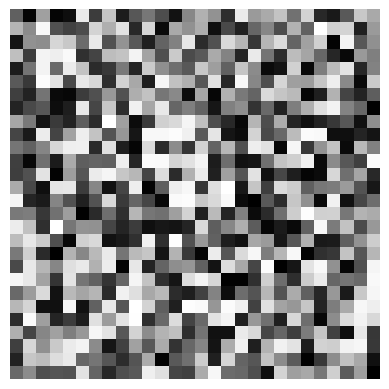

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate an image from the trained generator
def generate_image():
    # Generate random noise
    noise = np.random.normal(0, 1, (1, 100))

    # Use the generator to create an image
    generated_image = generator.predict(noise)

    # Rescale the image pixel values to [0, 1]
    generated_image = 0.5 * generated_image + 0.5

    # Display the image
    plt.imshow(generated_image[0, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

# Generate and display an image
generate_image()


# **Text Generation**

In [ ]:
#Importing libraries and dataset
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import string

class TextDataset(Dataset):
    def __init__(self, text, sequence_length=50):

        text = text.lower().translate(str.maketrans("", "", string.punctuation))
        self.sequence_length = sequence_length


        chars = sorted(list(set(text)))
        self.char2idx = {ch: idx for idx, ch in enumerate(chars)}
        self.idx2char = {idx: ch for ch, idx in self.char2idx.items()}


        self.encoded_text = np.array([self.char2idx[ch] for ch in text])

    def __len__(self):
        return len(self.encoded_text) - self.sequence_length

    def __getitem__(self, idx):
        return (
            torch.tensor(self.encoded_text[idx:idx + self.sequence_length], dtype=torch.long),
            torch.tensor(self.encoded_text[idx + 1:idx + self.sequence_length + 1], dtype=torch.long),
        )


with open('/content/chatgpt-reddit-comments.csv', 'r') as file:
    text = file.read()

dataset = TextDataset(text)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)




#Architecture

import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, n_layers):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        lstm_out, hidden = self.lstm(x, hidden)
        output = self.fc(lstm_out.reshape(lstm_out.size(0) * lstm_out.size(1), self.hidden_dim))
        return output, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        return hidden

vocab_size = len(dataset.char2idx)
embedding_dim = 128
hidden_dim = 256
n_layers = 2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size, embedding_dim, hidden_dim, n_layers).to(device)




#Training the model

n_epochs = 2
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

model.train()

for epoch in range(n_epochs):
    for inputs, targets in dataloader:
        batch_size = inputs.size(0)
        hidden = model.init_hidden(batch_size)
        hidden = tuple([each.data for each in hidden])
        inputs, targets = inputs.to(device), targets.to(device)

        model.zero_grad()
        output, hidden = model(inputs, hidden)

        loss = criterion(output, targets.view(-1))
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}/{n_epochs}, Loss: {loss.item()}')



#Generating text with Prompt

def generate_text(model, start_str, char2idx, idx2char, predict_len=100):
  model.eval()
  chars = [char2idx[ch] for ch in start_str]
  batch__size = inputs.size(0)
  hidden = model.init_hidden(batch_size)

  for i in range(predict_len):
    char_tensor = torch.tensor(chars[-1], dtype=torch.long).unsqueeze(0).unsqueeze(0).to(device)
    output, hidden = model(char_tensor, hidden)
    prob = nn.functional.softmax(output[-1], dim=0).data
    char_idx = torch.max(prob, dim=0)[1].item()
    chars.append(char_idx)

  return start_str + ''.join(idx2char[idx] for idx in chars[len(start_str):])


start_str = input('Enter text to generate from: ')
generated_text = generate_text(model, start_str, dataset.char2idx, dataset.idx2char, predict_len = 200)
print(generated_text)




#Saving and loading the model

torch.save(model.state_duct(), 'lstm_model.pth')

model.load_state_dict(torch.load('lstm_model_pth'))
model.eval()

KeyboardInterrupt: 

# **Text Generation with LSTM**

In [ ]:
import numpy as np

with open("/content/wonderland.txt", 'r', encoding = 'utf-8') as file:
  text = file.read().lower()

char = sorted(list(set(text)))
char_to_int = dict((c,i) for i, c in enumerate(char))
n_char = len(text)
n_vocab = len(char)

In [ ]:
seq_length = 100
dataX = []
dataY = []
for i in range(0,n_char- seq_length,1):
  seq_in = text[i:i+seq_length]
  seq_out = text[i+seq_length]
  dataX.append([char_to_int[char] for char in seq_in])
  dataY.append(char_to_int[seq_out])
n_pattern = len(dataX)
print("Total Pattern:", n_pattern)

Total Pattern: 13537


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

x = torch.tensor(dataX, dtype=torch.float32).reshape(n_pattern, seq_length,1)
x = x/float(n_vocab)
y = torch.tensor(dataY)
print(x.shape, y.shape)

torch.Size([13537, 100, 1]) torch.Size([13537])


In [ ]:
import torch.utils.data as data

class CharModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.lstm = nn.LSTM(input_size=1, hidden_size = 256, num_layers =1, batch_first= True)
    self.dropout = nn.Dropout(0.2)
    self.linear = nn.Linear(256, n_vocab)
  def forward(self, x):
    x,_ = self.lstm(x)
    x = x[:,-1,:]
    x = self.linear(self.dropout(x))
    return x

In [ ]:
n_epochs = 5
batch_size = 128
model = CharModel()

optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss(reduction='sum')
loader = data.DataLoader(data.TensorDataset(x,y), shuffle=True, batch_size = batch_size)

best_model = None
best_loss = np.inf
for epoch in range(n_epochs):
  model.train()
  for x_batch, y_batch in loader:
    y_pred = model(x_batch)
    loss = loss_fn(y_pred, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  model.eval()
  loss = 0
  with torch.no_grad():
    for x_batch, y_batch in loader:
      y_pred = model(x_batch)
      loss += loss_fn(y_pred, y_batch)
    if loss < best_loss:
      best_loss = loss
      best_model = model.state_dict()
    print('Epoch %d: Cross-endropy: %.4f' % (epoch, loss))


torch.save([best_model, char_to_int], "single-char.pth")

Epoch 0: Cross-endropy: 39836.3047
Epoch 1: Cross-endropy: 39779.1953
Epoch 2: Cross-endropy: 39772.9219
Epoch 3: Cross-endropy: 39710.4453
Epoch 4: Cross-endropy: 39627.1211


In [ ]:
import numpy as np
import torch
import torch.nn as nn

best_model, char_to_int = torch.load("/content/single-char.pth")
n_vocab = len(char_to_int)
int_to_char = dict((i,c)for c , i in char_to_int.items())

class CharModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.lstm = nn.LSTM(input_size=1, hidden_size = 256, num_layers=1, batch_first=  True)
    self.dropout = nn.Dropout(0.2)
    self.linear = nn.Linear(256, n_vocab)

  def forward(self,x):
    x, _ = self.lstm(x)
    x = x[:,-1,:]
    x = self.linear(self.dropout(x))
    return x

model = CharModel()
model.load_state_dict(best_model)

filename = '/content/wonderland.txt'
seq_length = 100
raw_text = open(filename, 'r', encoding = 'utf-8').read()
raw_text = raw_text.lower()
start = np.random.randint(0,len(raw_text)-seq_length)
prompt = raw_text[start:start+seq_length]
pattern = [char_to_int[c] for c in prompt]

model.eval()
print('Prompt: "%s"' % prompt)
with torch.no_grad():
  for i in range(1000):
    x = np.reshape(pattern, (1, len(pattern), 1))/float(n_vocab)
    x = torch.tensor(x, dtype = torch.float32)
    prediction = model(x)

    index = int(prediction.argmax())
    result = int_to_char[index]
    print(result, end="")
    pattern.append(index)
    pattern = pattern[1:]
print(result, end="")
print("Done.")

Prompt: "he began thinking over all the children she knew that were of the same age as herself, to see if she"
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
import numpy as np
import torch
import torch.nn as nn

best_model, char_to_int = torch.load("/content/single-char.pth")
n_vocab = len(char_to_int)
int_to_char = dict((i,c) for c, i in char_to_int.items())

class CharModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=256, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.linear = nn.Linear(256, n_vocab)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = x[:,-1,:]
        x = self.linear(self.dropout(x))
        return x

model = CharModel()
model.load_state_dict(best_model)

filename = '/content/wonderland.txt'
seq_length = 100
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
start = np.random.randint(0, len(raw_text) - seq_length)
prompt = raw_text[start:start + seq_length]
pattern = [char_to_int[c] for c in prompt]

model.eval()
print('Prompt:', prompt)
print('\nGenerated text:')

generated_text = prompt
with torch.no_grad():
    for i in range(1000):
        x = np.reshape(pattern, (1, len(pattern), 1)) / float(n_vocab)
        x = torch.tensor(x, dtype=torch.float32)
        prediction = model(x)

        index = int(prediction.argmax())
        result = int_to_char[index]
        generated_text += result
        pattern.append(index)
        pattern = pattern[1:]

print(generated_text)
print("\nDone.")

<ipython-input-1-9d8aea938f1b>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model, char_to_int = torch.load("/content/single-char.pth")


FileNotFoundError: [Errno 2] No such file or directory: '/content/single-char.pth'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
import numpy as np

# Step 1: Prepare the data
qa_pairs = [
    ("What is the capital of France?", "The capital of France is Paris."),
    ("Who wrote Romeo and Juliet?", "William Shakespeare wrote Romeo and Juliet."),
]
def load_qa_dataset(excel_file):
  data = pd.read_excel(excel_file)
  pa_pairs = [(row["Question"], row["Answer"]) for _, row in data.iterrows()]
  return qa_pairs

qa_pairs = load_qa_dataset("/content/s10-question-answer-pairs.xls")

# Step 2: Tokenization and vocabulary building
def build_vocab(qa_pairs):
    vocab = set()
    for question, answer in qa_pairs:
        vocab.update(question.split() + answer.split())
    return {word: i for i, word in enumerate(sorted(vocab))}

vocab = build_vocab(qa_pairs)
vocab_size = len(vocab)

# Step 3: Create a dataset class
class QADataset(Dataset):
    def __init__(self, qa_pairs, vocab):
        self.qa_pairs = qa_pairs
        self.vocab = vocab

    def __len__(self):
        return len(self.qa_pairs)

    def __getitem__(self, idx):
        question, answer = self.qa_pairs[idx]
        question_encoded = [self.vocab.get(word, 0) for word in question.split()]
        answer_encoded = [self.vocab.get(word, 0) for word in answer.split()]
        return torch.tensor(question_encoded), torch.tensor(answer_encoded)

def collate_fn(batch):
    questions, answers = zip(*batch)
    questions_padded = pad_sequence(questions, batch_first=True, padding_value=0)
    answers_padded = pad_sequence(answers, batch_first=True, padding_value=0)
    return questions_padded, answers_padded

# Step 4: Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths, batch_first=True, enforce_sorted=False)
        output, _ = self.rnn(packed)
        output, _ = pad_packed_sequence(output, batch_first=True)
        return self.fc(output)

# Step 5: Training function
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for questions, answers in train_loader:
            optimizer.zero_grad()
            lengths = torch.tensor([len(q[q != 0]) for q in questions])
            output = model(questions, lengths)
            loss = criterion(output.view(-1, vocab_size), answers.view(-1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Step 6: Generation function
def generate_answer(model, question, vocab, max_length=50):
    model.eval()
    rev_vocab = {i: word for word, i in vocab.items()}
    question_encoded = torch.tensor([[vocab.get(word, 0) for word in question.split()]])
    lengths = torch.tensor([question_encoded.size(1)])

    with torch.no_grad():
        output = model(question_encoded, lengths)
        _, predicted = output.max(2)

    answer = []
    for i in range(min(max_length, predicted.size(1))):
        next_word = rev_vocab[predicted[0][i].item()]
        if next_word == '.':
            break
        answer.append(next_word)

    return ' '.join(answer)

# Step 7: Set up and train the model
dataset = QADataset(qa_pairs, vocab)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

embedding_dim = 128
hidden_dim = 256
model = RNNModel(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # ignore padding index
optimizer = optim.Adam(model.parameters())
num_epochs = 100
train(model, train_loader, criterion, optimizer, num_epochs)

# Step 8: Use the model
while True:
    user_question = input("Ask a question (or type 'quit' to exit): ")
    if user_question.lower() == 'quit':
        break
    answer = generate_answer(model, user_question, vocab)
    print("Answer:", answer)

Epoch 1/100, Loss: 2.8604
Epoch 2/100, Loss: 2.6198
Epoch 3/100, Loss: 2.3874
Epoch 4/100, Loss: 2.1627
Epoch 5/100, Loss: 1.9456
Epoch 6/100, Loss: 1.7370
Epoch 7/100, Loss: 1.5389
Epoch 8/100, Loss: 1.3537
Epoch 9/100, Loss: 1.1841
Epoch 10/100, Loss: 1.0320
Epoch 11/100, Loss: 0.8983
Epoch 12/100, Loss: 0.7827
Epoch 13/100, Loss: 0.6844
Epoch 14/100, Loss: 0.6018
Epoch 15/100, Loss: 0.5332
Epoch 16/100, Loss: 0.4770
Epoch 17/100, Loss: 0.4315
Epoch 18/100, Loss: 0.3949
Epoch 19/100, Loss: 0.3659
Epoch 20/100, Loss: 0.3430
Epoch 21/100, Loss: 0.3250
Epoch 22/100, Loss: 0.3108
Epoch 23/100, Loss: 0.2998
Epoch 24/100, Loss: 0.2911
Epoch 25/100, Loss: 0.2843
Epoch 26/100, Loss: 0.2789
Epoch 27/100, Loss: 0.2745
Epoch 28/100, Loss: 0.2711
Epoch 29/100, Loss: 0.2682
Epoch 30/100, Loss: 0.2659
Epoch 31/100, Loss: 0.2640
Epoch 32/100, Loss: 0.2624
Epoch 33/100, Loss: 0.2611
Epoch 34/100, Loss: 0.2599
Epoch 35/100, Loss: 0.2590
Epoch 36/100, Loss: 0.2581
Epoch 37/100, Loss: 0.2574
Epoch 38/1

In [ ]:
!pip install openpyxl

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
import pandas as pd

# Step 1: Prepare the data
def load_qa_dataset(csv_file):
    data = pd.read_csv(csv_file, engine="python")
    qa_pairs = [(row["Word"], row["Definition"]) for _, row in data.iterrows() if type(row["Word"])==str and type(row["Definition"])==str]
    return qa_pairs

qa_pairs = load_qa_dataset("/content/OPTED-Dictionary.csv")

# Step 2: Tokenization and vocabulary building
def build_vocab(qa_pairs):
    vocab = set()
    for question, answer in qa_pairs:
        vocab.update(question.split() + answer.split())
    return {word: i for i, word in enumerate(sorted(vocab))}

vocab = build_vocab(qa_pairs)
vocab_size = len(vocab)

# Step 3: Create a dataset class
class QADataset(Dataset):
    def __init__(self, qa_pairs, vocab):
        self.qa_pairs = qa_pairs
        self.vocab = vocab

    def __len__(self):
        return len(self.qa_pairs)

    def __getitem__(self, idx):
        question, answer = self.qa_pairs[idx]
        question_encoded = [self.vocab.get(word, 0) for word in question.split()]
        answer_encoded = [self.vocab.get(word, 0) for word in answer.split()]
        return torch.tensor(question_encoded), torch.tensor(answer_encoded)

def collate_fn(batch):
    questions, answers = zip(*batch)
    questions_padded = pad_sequence(questions, batch_first=True, padding_value=0)
    answers_padded = pad_sequence(answers, batch_first=True, padding_value=0)
    lengths = torch.tensor([len(q) for q in questions])
    return questions_padded, answers_padded, lengths

# Step 4: Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths, batch_first=True, enforce_sorted=False)
        output, _ = self.rnn(packed)
        output, _ = pad_packed_sequence(output, batch_first=True)
        return self.fc(output)

# Step 5: Training function
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for questions, answers, lengths in train_loader:
            optimizer.zero_grad()
            output = model(questions, lengths)
            loss = criterion(output.view(-1, vocab_size), answers.view(-1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Step 6: Generation function
def generate_answer(model, question, vocab, max_length=50):
    model.eval()
    rev_vocab = {i: word for word, i in vocab.items()}
    question_encoded = torch.tensor([[vocab.get(word, 0) for word in question.split()]])
    lengths = torch.tensor([question_encoded.size(1)])

    with torch.no_grad():
        output = model(question_encoded, lengths)
        output = torch.argmax(output, dim=2)

    answer = []
    for i in range(min(max_length, output.size(1))):
        next_word = rev_vocab.get(output[0][i].item(), '<unk>')
        if next_word == '.':
            break
        answer.append(next_word)

    return ' '.join(answer)

# Step 7: Set up and train the model
dataset = QADataset(qa_pairs, vocab)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

embedding_dim = 128
hidden_dim = 256
model = RNNModel(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # ignore padding index
optimizer = optim.Adam(model.parameters())
num_epochs = 100
train(model, train_loader, criterion, optimizer, num_epochs)

# Step 8: Use the model
while True:
    user_question = input("Ask a question (or type 'quit' to exit): ")
    if user_question.lower() == 'quit':
        break
    answer = generate_answer(model, user_question, vocab)
    print("Answer:", answer)


ValueError: Expected input batch_size (32) to match target batch_size (992).

In [ ]:
import pandas as pd
a = pd.read_csv("/content/OPTED-Dictionary.csv")
print(a)

              Word Count      POS  \
0                A     1       ""   
1                A     1       ""   
2                A     1       ""   
3                A     1       ""   
4                A     1  "prep."   
...            ...   ...      ...   
176004     Zymotic     7     "a."   
176005     Zymotic     7     "a."   
176006      Zythem     6     "n."   
176007  Zythepsary    10     "n."   
176008      Zythum     6     "n."   

                                               Definition  
0       "The first letter of the English and of many o...  
1       "The name of the sixth tone in the model major...  
2       "An adjective  commonly called the indefinite ...  
3       "In each; to or for each; as  """"twenty leagu...  
4                                       "In; on; at; by."  
...                                                   ...  
176004     "Of  pertaining to or caused by fermentation."  
176005  "Designating  or pertaining to a certain class...  
176006         